In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
data_import = pd.read_csv("netflix_titles.csv")
data_import.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# EDA

DateTime Format Fixing

In [4]:
data_import['date_added']=pd.to_datetime(data_import['date_added'].str.strip(), format="%B %d, %Y")
data_import.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data_import.shape

(8807, 12)

In [6]:
data_import.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Numerical Data Summary

In [7]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Oldest Movie release is in 1925

Recent Movie release is in 2021

###

## Date Analysis

<AxesSubplot:>

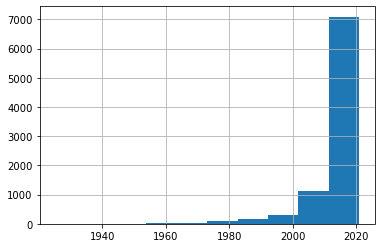

In [8]:
data_import['release_year'].hist() #matplotlib

In [9]:
px.histogram(data_import,x='release_year')

In [10]:
data_import[data_import['release_year']==1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [11]:
# extract Month From Date added and make new column
data_import['date_added_month']=data_import['date_added'].dt.month.fillna(0)
data_import['date_added_day']=data_import['date_added'].dt.day.fillna(0)

In [12]:
px.histogram(data_import,x='date_added', color="date_added_month")

In [13]:
px.histogram(data_import,x='date_added_month')

In [14]:
from turtle import color


px.histogram(data_import,x='date_added_day', color='type')
# looks like nf adds movies on 1st date followed by 15th than any other

Looks like netflix adds more movies on 1st date followed by 15th date than any other day of month

## String Column Analysis

In [15]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day'],
      dtype='object')

In [16]:
data_import['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [17]:
data_import['country'].str.split(',',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [18]:
country_count = data_import.copy()
country_count = pd.concat([country_count, data_import['country'].str.split(',',expand=True)], axis=1)
country_count = country_count.melt(id_vars=['type','title'], value_vars=range(12), value_name='Country')
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.strip()
country_count

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [19]:
px.histogram(country_count,"Country",color="type").update_xaxes(categoryorder="total descending")

Most of the movies are made in US followed by India and UK

More TV Shows(170) are made in South Korea Than the Movies(61)

In [20]:
px.histogram(data_import,'rating').update_xaxes(categoryorder='total descending')

In [28]:
data_import['cast_count'] = data_import['cast'].str.split(',')
data_import = data_import[data_import['cast_count'].notna()] 
data_import['cast_count'] = data_import['cast_count'].apply(lambda x: len(x))
data_import.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,24.0,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,10


In [22]:
px.histogram(data_import,'cast_count')

In [23]:
show_seasons = data_import.loc[data_import.type == 'TV Show',['title','duration']]
show_seasons #.loc[show_seasons.title == 'Kota Factory']

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
8,The Great British Baking Show,9 Seasons
...,...,...
8785,YOM,1 Season
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons


In [24]:
px.histogram(show_seasons, "duration").update_xaxes(categoryorder='total descending')

In [25]:
movie_duration = data_import.loc[data_import.type=='Movie', ['type','duration']]
movie_duration['duration'] = movie_duration['duration'].str.split(" ", expand = True)[0]
movie_duration['duration'] = movie_duration['duration'].astype('float64')
#movie_duration
px.histogram(movie_duration,'duration', nbins= 100) #.update_xaxes(categoryorder='total descending')

In [26]:
new_data_import = pd.read_csv("netflix_titles.csv")
genres = new_data_import.copy()
genres =pd.concat([genres, new_data_import['listed_in'].str.split(',',expand=True)], axis = 1)
genres = genres.melt(id_vars= ['type', 'title'], value_vars=range(3), value_name='Listed_in')
genres = genres[genres['Listed_in'].notna()]
genres['Listed_in'] = genres['Listed_in'].str.strip()
genres

,type,title,variable,Listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [27]:
px.histogram(genres, y = 'Listed_in',height=750).update_yaxes(categoryorder='total ascending')